In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_products = pd.read_csv('data\olist_products_dataset.csv')

In [3]:
'Comprobamos que no hay duplicados'

data_products.duplicated().sum()

0

In [4]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [5]:
data_products.rename(columns= {'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace = True)

In [6]:
data_products

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Opción: eliminar las columnas que nos indican la cantidad de caracteres de los nombres de productos y sus descripciones**

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


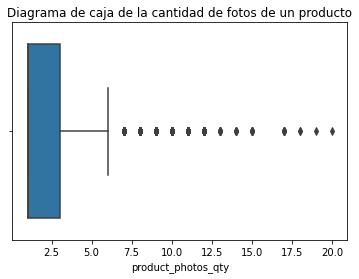

In [7]:
sns.boxplot(data_products.product_photos_qty)
plt.title('Diagrama de caja de la cantidad de fotos de un producto')
plt.show()

*Si bien se detectan algunos outliers, tiene que sentido que un producto pueda llegar a tener esa cantidad de fotos*

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


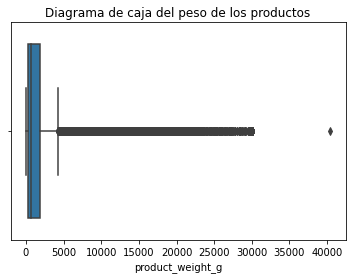

In [8]:
sns.boxplot(data_products.product_weight_g)
plt.title('Diagrama de caja del peso de los productos')
plt.show()

In [9]:
'Identificamos outliers para el peso'

Q1 = data_products['product_weight_g'].quantile(0.25)
Q3 = data_products['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out_peso = (data_products['product_weight_g']<BI) | (data_products['product_weight_g']>BS) 

In [10]:
'Tenemos 4551 outliers, pero no se recomienda eliminarlos porque están dentro un rango racional'

out_peso.sum()

4551

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


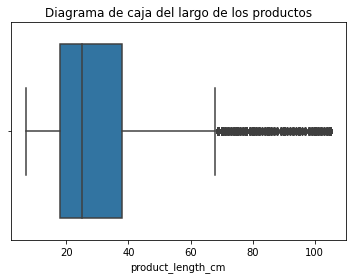

In [11]:
sns.boxplot(data_products.product_length_cm)
plt.title('Diagrama de caja del largo de los productos')
plt.show()

In [12]:
'Tenemos 1380 valores extremos del largo del producto, no se recomienda eliminarlos porque son valores racionales'

Q1 = data_products['product_length_cm'].quantile(0.25)
Q3 = data_products['product_length_cm'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out_largo = (data_products['product_length_cm']<BI) | (data_products['product_length_cm']>BS) 
print(out_largo.sum())

1380


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


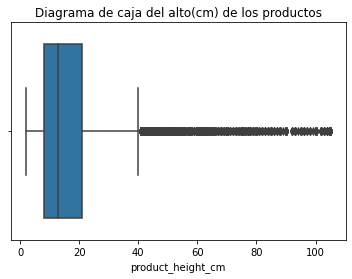

In [13]:
sns.boxplot(data_products.product_height_cm)
plt.title('Diagrama de caja del alto(cm) de los productos')
plt.show()

In [14]:
'Tenemos 1892 valores extremos del alto del producto, no se recomienda eliminarlos porque son valores racionales'

Q1 = data_products['product_height_cm'].quantile(0.25)
Q3 = data_products['product_height_cm'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out_alto = (data_products['product_height_cm']<BI) | (data_products['product_height_cm']>BS) 
print(out_alto.sum())

1892


c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


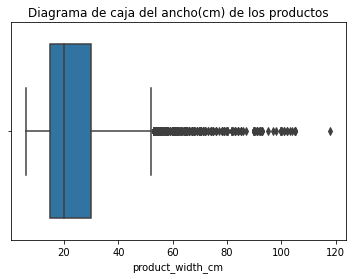

In [15]:
sns.boxplot(data_products.product_width_cm)
plt.title('Diagrama de caja del ancho(cm) de los productos')
plt.show()

In [16]:
'Tenemos 912 valores extremos del ancho del producto, no se recomienda eliminarlos porque son valores racionales'

Q1 = data_products['product_width_cm'].quantile(0.25)
Q3 = data_products['product_width_cm'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out_ancho = (data_products['product_width_cm']<BI) | (data_products['product_width_cm']>BS) 
print(out_ancho.sum())

912


VALORES FALTANTES

In [17]:
data_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [18]:
'Los faltantes en las útlimas 4 columnas corresponden a los mismos registros. Fíjense si prefieren eliminarlos'

data_products[data_products.product_weight_g.isnull()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
'Los faltantes en las primeras 4 columnas (desde category_name) corresponden a los mismos registros. Fíjense qué estrategia prefieren, no recomiendo eliminarlos'
'porque podemos perder la integridad referencial con la tabla ventas'

data_products[data_products.product_category_name.isnull()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [20]:
data_products

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


+ Dropear las columnas irrelevantes (cantidad de caracteres de descripción y nombre)
+ Una opción puede ser rellenar con 'sin_categoría' a aquellos productos que no la tienen
+ product category name ingles -- category product 

In [25]:
data_products.drop(columns=['product_name_length', 'product_description_length'], axis=1, inplace=True)
data_products['product_category_name'].fillna('sin_categoria', inplace=True)

In [48]:
datamerge = pd.read_parquet('dataparquet\data_category_productP')
data_products = pd.merge(datamerge,data_products)
data_products.drop(columns=['product_category_name'], axis=1, inplace=True)
data_products.to_parquet('dataparquet\data_productsP')